# Algorithms 4 week 3: The traveling salesman problem revisited with heuristics

In [1]:
import sys
IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
    from google.colab import files
    uploaded = files.upload()
    data = uploaded['nn.txt'].decode('ascii')
else:
    uploaded_edges = open('./nn.txt', 'r')
    data = uploaded_edges.read()

In [10]:
# Test case, uncomment to try it instead of the file
# Expected path: 1 3 2 5 6 4 1
# Expected TSP length: 15.2361

# data = """6
# 1 2 1
# 2 4 0
# 3 2 0
# 4 0 0
# 5 4 3
# 6 0 3
# """

In [2]:
x, y = [], []
coordinates = data.split('\n')[1:-1]

n = len(coordinates)
for line in coordinates:
    x.append(float(line.split()[1])-1)
    y.append(float(line.split()[2])-1)

assert n == len(x) == len(y)

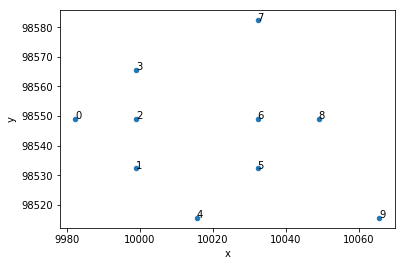

In [4]:
import pandas as pd

n_points = 10

df = pd.DataFrame({"x": x, "y": y}).iloc[:n_points]
ax = df.plot.scatter("x", "y");

for i, txt in enumerate(range(n_points)):
    ax.annotate(i, (x[i], y[i]))

## Traveling salesman problem heuristic

In [ ]:
from math import sqrt
import time

heads = [0]
head = 0
distances = []
remaining_nodes = list(range(1, n))

t0 = time.time()
for it in range(n-1):
    if (it > 0) and (it % 10000 == 0):
        print(f"{it}-th iteration, {time.time()-t0:.1f}s elapsed")
    x_head, y_head = x[head], y[head]
    min_distance = 1e18
    for i in remaining_nodes:
        delta_x = (x[i] - x_head)**2
        if delta_x > min_distance:
            break
        d = delta_x + (y[i]-y_head)**2 
        if d < min_distance:
            min_distance = d
            head = i
    remaining_nodes.remove(head)
    heads.append(head)
    distances.append(min_distance)
distances.append((x[0] - x[head])**2+ (y[0]-y[head])**2)
distances = [sqrt(d) for d in distances]

# print(f"Path: {heads}")
# print(f"Distances: {distances}")
print(f"Length: {sum(distances)}")

10000-th iteration, 35.7s elapsed
20000-th iteration, 63.8s elapsed
30000-th iteration, 90.7s elapsed
